In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition, metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [208]:
def drop_outliers(data, columns):
    for item in columns:
        q1 = data[item].quantile(0.25)
        q3 = data[item].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        upper_array = np.where(data[item]>=upper)[0]
        lower_array = np.where(data[item]<=lower)[0]

        data.drop(index=upper_array, inplace=True)
        data.drop(index=lower_array, inplace=True)
    return data

In [209]:
df = pd.read_csv("Country-data.csv")
df["imports"] = df["imports"].div(100).round(4)
df["exports"] = df["exports"].div(100).round(4)
df["health"] = df["health"].div(100).round(4)
df["income"] = df["income"].astype(float)
df["gdpp"] = df["gdpp"].astype(float)
df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.00000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,0.41109,0.068157,0.468902,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,0.27412,0.027468,0.242095,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.00110,0.018100,0.000700,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,0.23800,0.049200,0.302000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,0.35000,0.063200,0.433000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,0.51350,0.086000,0.587500,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,2.00000,0.179000,1.740000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [210]:
#numerical_data = ["gdpp","total_fer", "life_expec", "inflation", "income", "imports" , "health", "exports", "child_mort"]
#df2 = drop_outliers(df, numerical_data)

In [211]:
df.notnull().count()

country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

In [212]:
df.notna().count()

country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

In [213]:
df3 = df.drop_duplicates(df)

# 2.

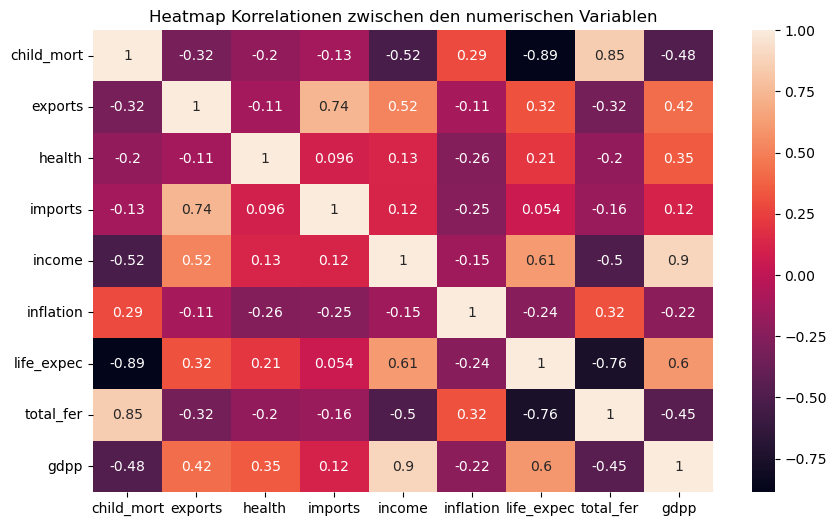

In [214]:
df4=df3.drop(["country"], axis=1)
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(dfnew.corr(),annot=True,ax=ax)
plt.title("Heatmap Korrelationen zwischen den numerischen Variablen",fontsize=12)
plt.show()

In [215]:
sc = StandardScaler()
df4[numerical_data] = sc.fit_transform(dfnew[numerical_data])
df4.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082456,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479659,-0.097016,0.070836,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641765,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165317,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497567,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [236]:
pca = decomposition.PCA(n_components=9)
feature_names = df.columns

pca.fit(dfnew)
df4_pca = pca.transform(dfnew)

In [237]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1,
                                                         round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, feature_names)))

1 component: 45.95% of initial variance
-0.420 x country + 0.284 x child_mort + 0.151 x exports + 0.161 x health + 0.398 x imports + -0.193 x income + 0.426 x inflation + -0.404 x life_expec + 0.393 x total_fer
2 component: 17.18% of initial variance
0.193 x country + 0.613 x child_mort + -0.243 x exports + 0.672 x health + 0.023 x imports + -0.008 x income + -0.223 x inflation + 0.155 x life_expec + -0.046 x total_fer
3 component: 13.0% of initial variance
-0.030 x country + 0.145 x child_mort + -0.597 x exports + -0.300 x health + 0.302 x imports + 0.643 x income + 0.114 x inflation + 0.020 x life_expec + 0.123 x total_fer
4 component: 11.05% of initial variance
0.371 x country + 0.003 x child_mort + 0.462 x exports + -0.072 x health + 0.392 x imports + 0.150 x income + -0.204 x inflation + 0.378 x life_expec + 0.532 x total_fer
5 component: 7.34% of initial variance
-0.169 x country + 0.058 x child_mort + 0.518 x exports + 0.255 x health + -0.247 x imports + 0.715 x income + 0.108 x

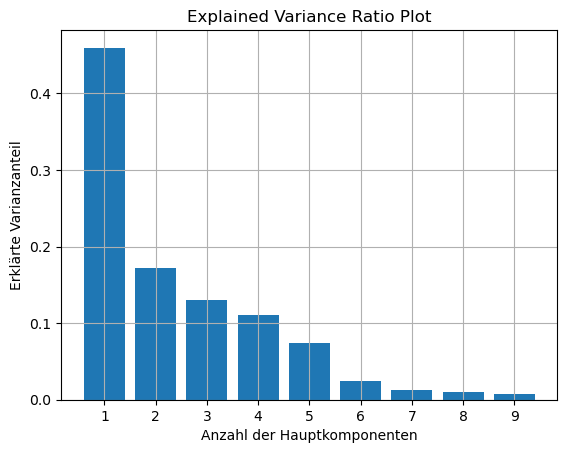

In [238]:
x_ticks = range(1, len(pca.explained_variance_ratio_) + 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, tick_label=x_ticks)
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Erklärte Varianzanteil')
plt.title('Explained Variance Ratio Plot')
plt.grid()

plt.show()

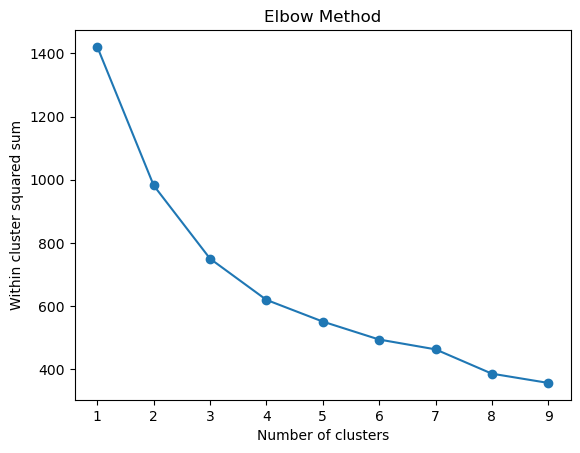

In [228]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(df4_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster squared sum")
plt.title("Elbow Method")
plt.show()

/var/folders/6k/b27g2vms46qb4mwsy7_s36zr0000gp/T/ipykernel_29839/856737674.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df4_pca[labels == i , 0] , df4_pca[labels == i , 1] , cmap="viridis", label = i)


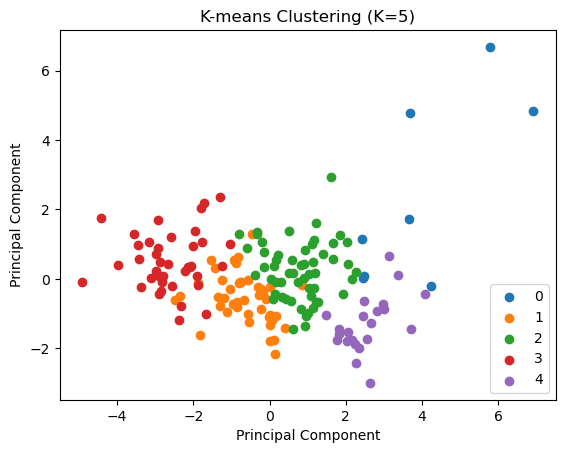

In [239]:
kmeans = KMeans(n_clusters=5, random_state=10, n_init="auto").fit(df4_pca)
labels = kmeans.fit_predict(df4_pca)
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(df4_pca[labels == i , 0] , df4_pca[labels == i , 1] , cmap="viridis", label = i)

plt.xlabel("Principal Component")
plt.ylabel("Principal Component")
plt.title(f"K-means Clustering (K={5})")
plt.legend(loc="lower right")
plt.show()

In [235]:
labels = kmeans.labels_
metrics.silhouette_score(df4_pca, labels, metric='euclidean')

0.25227659361861654